In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
import os

pd.options.mode.chained_assignment = None

In [2]:
DIR = os.getcwd()

# raw data
RAW = "\data\\raw"
PATH_DF_TIMESERIES = DIR + RAW + '\\df_timeseries_en.tsv.gz' # 571 mb # 2015-01-05 -- 2019-09-30

# clean data
CLEAN = "\data\\clean"
PATH_TECH_CHANNELS = DIR + CLEAN + '\\tech_review_channels.tsv.gz'
PATH_TECH_VIDEOS = DIR + CLEAN + '\\tech_review_videos.tsv.gz'

In [5]:
df_timeseries = pd.read_csv(PATH_DF_TIMESERIES, compression="infer", sep="\t")
tech_review_videos = pd.read_csv(PATH_TECH_VIDEOS, compression="infer", sep="\t")
tech_review_channels = pd.read_csv(PATH_TECH_CHANNELS, compression="infer", sep="\t")

### Channel's success (UCXCub_g0HThj3z2Ok42VoQQ)

In [56]:
tech_review_timeseries = df_timeseries[df_timeseries.channel.isin(tech_review_channels.channel_id.unique())]
tech_review_timeseries['datetime'] = pd.to_datetime(tech_review_timeseries['datetime'])
tech_review_timeseries['year'] = tech_review_timeseries['datetime'].dt.year

In [61]:
mean_delta_subs = tech_review_timeseries.groupby(['channel','year'],as_index=False)[['delta_subs']].mean().groupby('channel',as_index=False)['delta_subs'].mean().rename({'delta_subs':'mean_delta_subs'},axis=1)
mean_delta_subs

,channel,mean_delta_subs
0,UC-3XJxY4sVdB_LG2idABvig,4161.385427
1,UC-8NKfvYQoZLYcwdU_gr4Cg,108.552615
2,UC-NXC-hJ5Y7i6s8ta2nQMSw,272.097526
3,UC-P5hcUfm_VcL49-kClyqtw,292.487075
4,UC-Qw5gt8r4RCpDaXTxY46Fg,84.397461
...,...,...
1158,UCzmwnZ_ZElg6kuE6e5QS4pg,806.190612
1159,UCzsR3ghNLC6qCQrHlAKlGVQ,378.649916
1160,UCzuhnV9yUolL8Evdd_nhAaA,63.721315
1161,UCzv51oYbxIKw1OqHLyCPSKg,96.696167


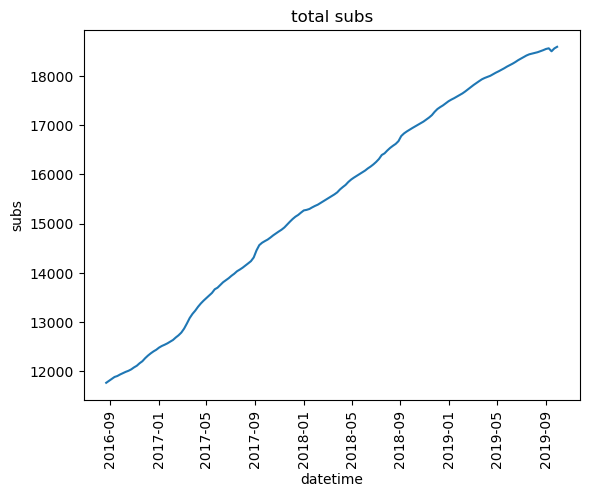

In [47]:
sns.lineplot(tech_review_timeseries[tech_review_timeseries.channel=='UCXCub_g0HThj3z2Ok42VoQQ'], x='datetime', y='subs')
plt.xticks(rotation=90)
plt.title('total subs')
plt.show()

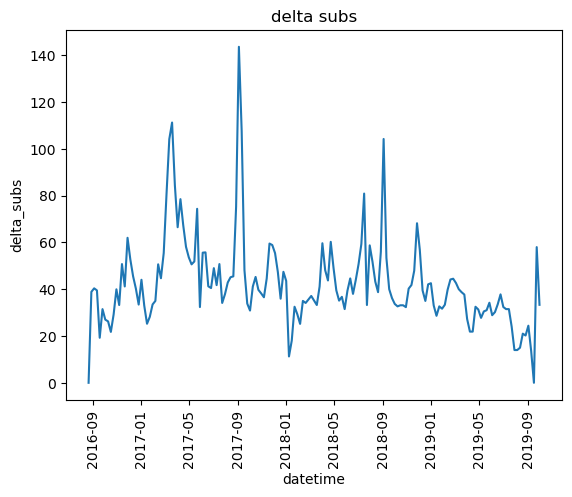

In [46]:
sns.lineplot(tech_review_timeseries[tech_review_timeseries.channel=='UCXCub_g0HThj3z2Ok42VoQQ'], x='datetime', y='delta_subs')
plt.xticks(rotation=90)
plt.title('delta subs')
plt.show()

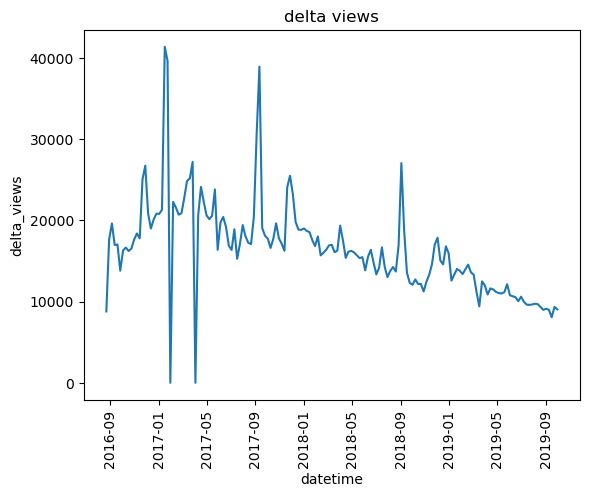

In [45]:
sns.lineplot(tech_review_timeseries[tech_review_timeseries.channel=='UCXCub_g0HThj3z2Ok42VoQQ'], x='datetime', y='delta_views')
plt.xticks(rotation=90)
plt.title('delta views')
plt.show()

### Videos success (UCXCub_g0HThj3z2Ok42VoQQ)

Text(0.5, 1.0, 'view count per video')

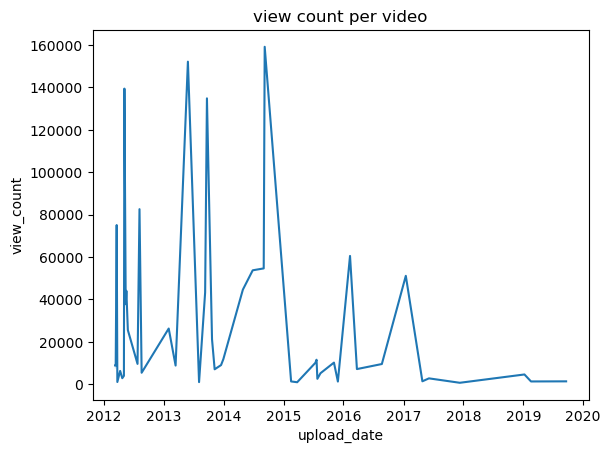

In [48]:
tech_review_videos.upload_date = pd.to_datetime(tech_review_videos.upload_date)
sns.lineplot(tech_review_videos[tech_review_videos.channel_id=='UCXCub_g0HThj3z2Ok42VoQQ'], x='upload_date', y='view_count')
plt.title('view count per video')

Text(0.5, 1.0, 'number of videos published')

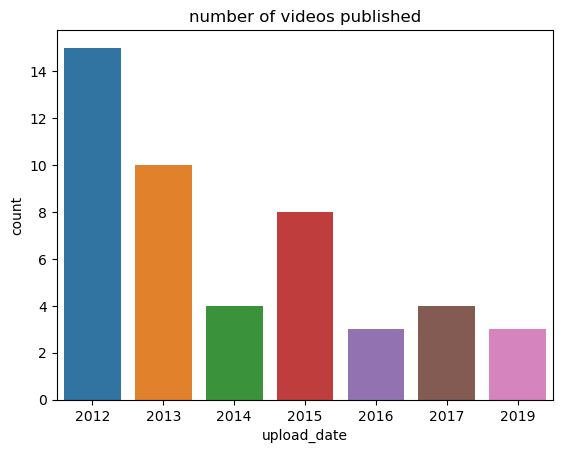

In [49]:
sns.countplot(x=tech_review_videos[tech_review_videos.channel_id=='UCXCub_g0HThj3z2Ok42VoQQ'].upload_date.dt.year)
plt.title('number of videos published')

In [ ]:
"""
    1. calculate calculate more metrics for the observational study
    2. write function for doing obs study
"""